In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import threading

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

In [8]:

models_dict = {
    #"SupportVectorMachine": SVC(kernel="linear"),
    #"LogisticRegression": LogisticRegression(solver="saga", n_jobs=-1),
    "ArtificalNeuralNetwork": MLPClassifier(hidden_layer_sizes=30, max_iter=1500),
    "DecisionTree": DecisionTreeClassifier(),
    #"ExtraTree": ExtraTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_jobs=-1),
    "ExtraTrees": ExtraTreesClassifier(n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="error", n_jobs=-1),
    #"LightGBM": LGBMClassifier(n_estimators=100, n_jobs=-1),
    #"AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=1.0),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
}

In [9]:
def GetAttributeMapping(data,grp=None,grp_gap=20,map_type=1):
    #print('in mapping')
    #print(data)
    #for col in data.columns[:7]:
    #        print(col,data[col].unique())
    mapping = {}
    mapping['NotA'] = -1
    mapping['NA'] = -1
    mapping[-1] = -1
    mapping[0] = 0
    mapping['Yes'] = 1
    mapping['No'] = 0
    if(map_type==1):
        for col in data.columns[:7]:
            #print(col,data[col].unique())
            if col != 'Year' or col !='Year.1':
                col_un = data[col].unique()
                cnt = 1
                for val in col_un:
                    if(val != 'NotA' or val != 'NA' ):
                        mapping[val] = cnt
                        cnt = cnt + 1
            else:
                for val in col_un:
                    if(val != 'NotA' or val != 'NA' ):
                        mapping[val] = int(val)
        #print(mapping)
        return mapping
    elif(map_type==2):
        for col in data.columns[2:6]:
            #print(col,it_full[col].unique())
            col_un = data[col].unique()
            cnt = 1
            for val in col_un:
                if(val != 'NotA'):
                    mapping[val] = cnt
                    cnt = cnt + 1
        
        for g in grp:
            grp_num = 1
            for member in grp[g]:
                mem_num = 1
                for val in member:
                    mapping[val] = grp_num*grp_gap+mem_num
                    mem_num = mem_num + 1
                grp_num = grp_num + 1
        return mapping
    

In [10]:
trains= ["University2/university_ps_dcexpanded_new_train.csv", "University1/university_saptarshi_train.csv", "Company/it_train_new1.csv"]
tests = ["change_University2.csv","change_University1.csv","change_Company.csv"]
test1 = ["change2_University2.csv","change2_University1.csv","change2_Company.csv"]
data_names = ["University2","University1","Company"]

C:\Users\tipsh\AppData\Local\Temp\ipykernel_22200\3567988325.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(mapping)
C:\Users\tipsh\AppData\Local\Temp\ipykernel_22200\3567988325.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Year'] = train_data['Year'].replace('NotA',-1)
C:\Users\tipsh\AppData\Local\Temp\ipykernel_22200\3567988325.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Model: ArtificalNeuralNetwork
Train Accuracy: 0.9999347887154381
Test Accuracy: 0.8787878787878788
Test1 Accuracy: 0.9716981132075472

[[67  6]
 [14 78]]
[[ 97   5]
 [  4 212]]



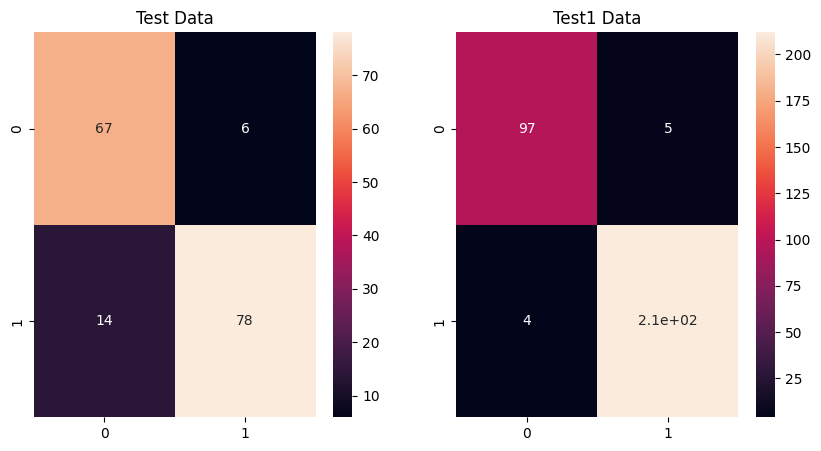

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        73
           1       0.93      0.85      0.89        92

    accuracy                           0.88       165
   macro avg       0.88      0.88      0.88       165
weighted avg       0.88      0.88      0.88       165

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       102
           1       0.98      0.98      0.98       216

    accuracy                           0.97       318
   macro avg       0.97      0.97      0.97       318
weighted avg       0.97      0.97      0.97       318

Model: DecisionTree
Train Accuracy: 1.0
Test Accuracy: 0.3575757575757576
Test1 Accuracy: 0.3742138364779874

[[44 29]
 [77 15]]
[[ 85  17]
 [182  34]]



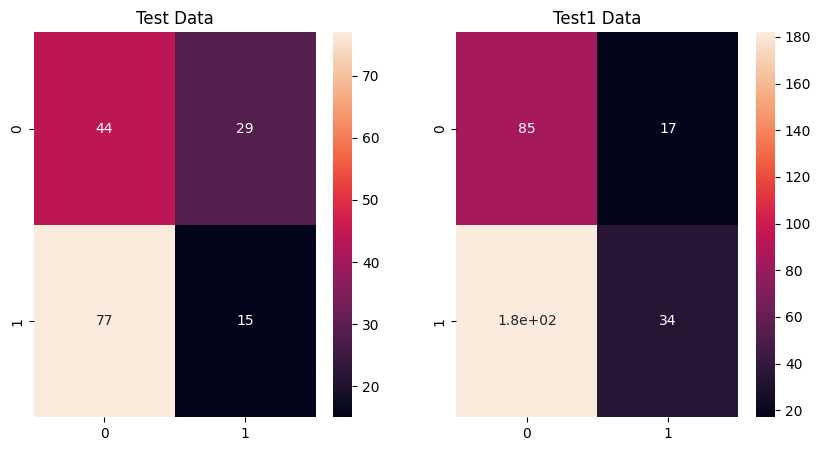

              precision    recall  f1-score   support

           0       0.36      0.60      0.45        73
           1       0.34      0.16      0.22        92

    accuracy                           0.36       165
   macro avg       0.35      0.38      0.34       165
weighted avg       0.35      0.36      0.32       165

              precision    recall  f1-score   support

           0       0.32      0.83      0.46       102
           1       0.67      0.16      0.25       216

    accuracy                           0.37       318
   macro avg       0.49      0.50      0.36       318
weighted avg       0.55      0.37      0.32       318

Model: RandomForest
Train Accuracy: 1.0
Test Accuracy: 0.5575757575757576
Test1 Accuracy: 0.3805031446540881

[[68  5]
 [68 24]]
[[ 95   7]
 [190  26]]



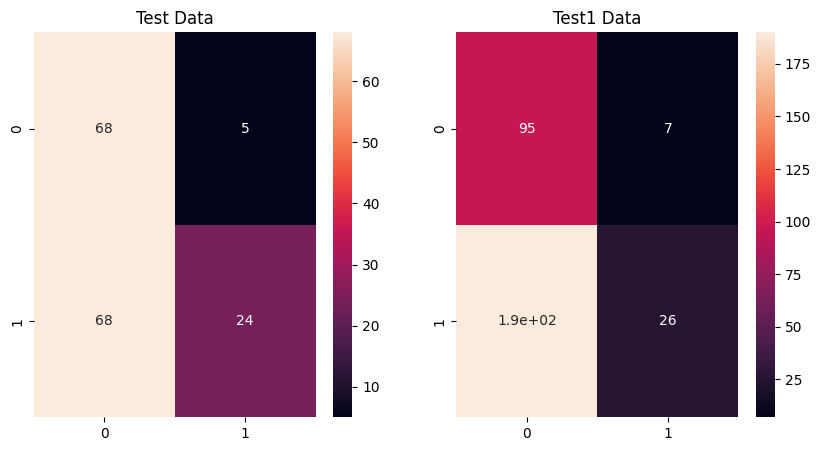

              precision    recall  f1-score   support

           0       0.50      0.93      0.65        73
           1       0.83      0.26      0.40        92

    accuracy                           0.56       165
   macro avg       0.66      0.60      0.52       165
weighted avg       0.68      0.56      0.51       165

              precision    recall  f1-score   support

           0       0.33      0.93      0.49       102
           1       0.79      0.12      0.21       216

    accuracy                           0.38       318
   macro avg       0.56      0.53      0.35       318
weighted avg       0.64      0.38      0.30       318

Model: ExtraTrees
Train Accuracy: 1.0
Test Accuracy: 0.5757575757575758
Test1 Accuracy: 0.3867924528301887

[[64  9]
 [61 31]]
[[ 94   8]
 [187  29]]



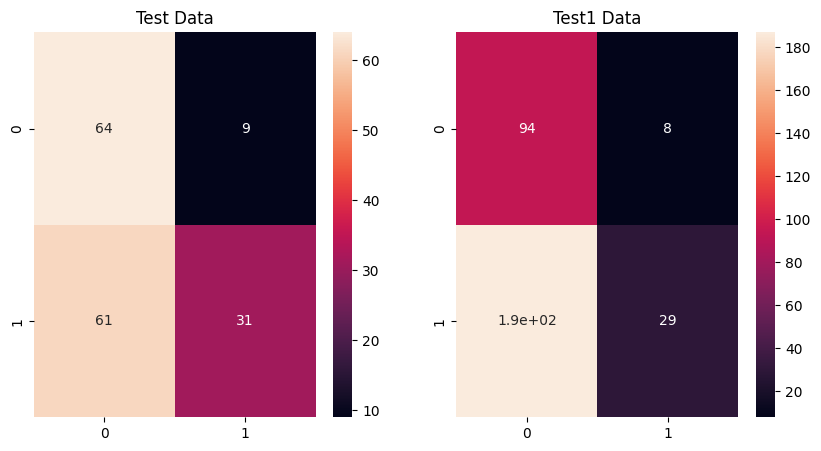

              precision    recall  f1-score   support

           0       0.51      0.88      0.65        73
           1       0.78      0.34      0.47        92

    accuracy                           0.58       165
   macro avg       0.64      0.61      0.56       165
weighted avg       0.66      0.58      0.55       165

              precision    recall  f1-score   support

           0       0.33      0.92      0.49       102
           1       0.78      0.13      0.23       216

    accuracy                           0.39       318
   macro avg       0.56      0.53      0.36       318
weighted avg       0.64      0.39      0.31       318

Model: XGBoost
Train Accuracy: 0.9946777559292106
Test Accuracy: 0.8363636363636363
Test1 Accuracy: 0.42138364779874216

[[63 10]
 [17 75]]
[[ 94   8]
 [176  40]]



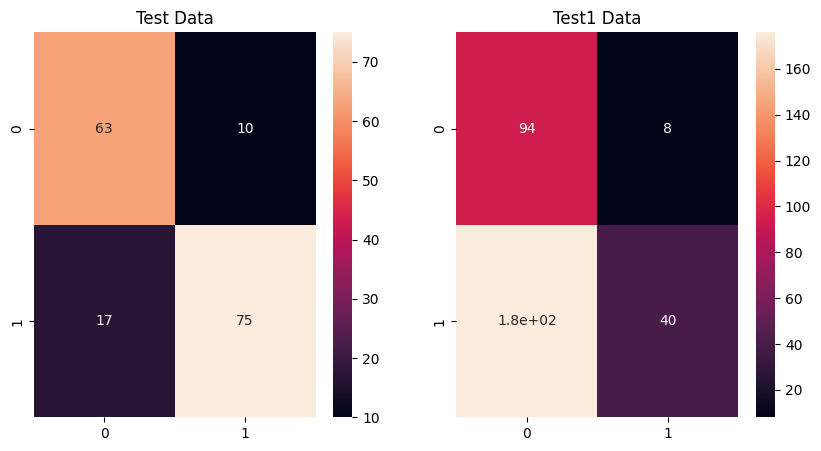

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        73
           1       0.88      0.82      0.85        92

    accuracy                           0.84       165
   macro avg       0.83      0.84      0.84       165
weighted avg       0.84      0.84      0.84       165

              precision    recall  f1-score   support

           0       0.35      0.92      0.51       102
           1       0.83      0.19      0.30       216

    accuracy                           0.42       318
   macro avg       0.59      0.55      0.40       318
weighted avg       0.68      0.42      0.37       318

Model: GradientBoosting
Train Accuracy: 0.957592600024078
Test Accuracy: 0.14545454545454545
Test1 Accuracy: 0.5974842767295597

[[15 58]
 [83  9]]
[[ 42  60]
 [ 68 148]]



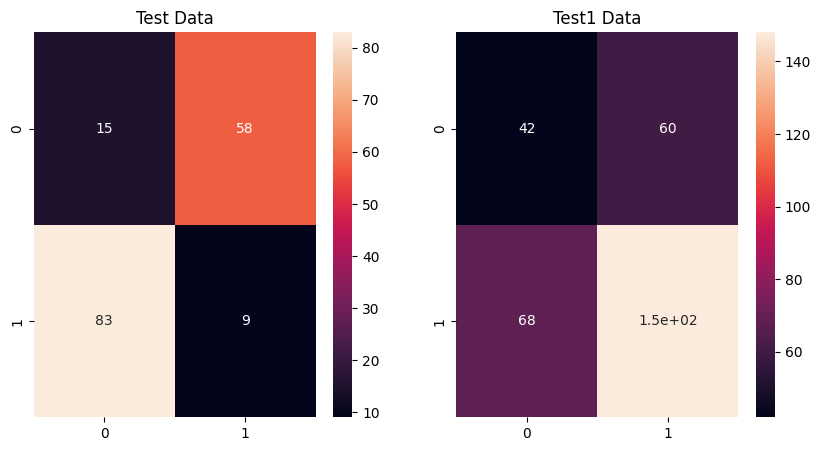

              precision    recall  f1-score   support

           0       0.15      0.21      0.18        73
           1       0.13      0.10      0.11        92

    accuracy                           0.15       165
   macro avg       0.14      0.15      0.14       165
weighted avg       0.14      0.15      0.14       165

              precision    recall  f1-score   support

           0       0.38      0.41      0.40       102
           1       0.71      0.69      0.70       216

    accuracy                           0.60       318
   macro avg       0.55      0.55      0.55       318
weighted avg       0.61      0.60      0.60       318



C:\Users\tipsh\AppData\Local\Temp\ipykernel_22200\3567988325.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(mapping)


Model: ArtificalNeuralNetwork
Train Accuracy: 0.9501488095238095
Test Accuracy: 0.9503845199702307
Test1 Accuracy: 0.0

[[3437  116]
 [  84  394]]
[[0 0]
 [1 0]]



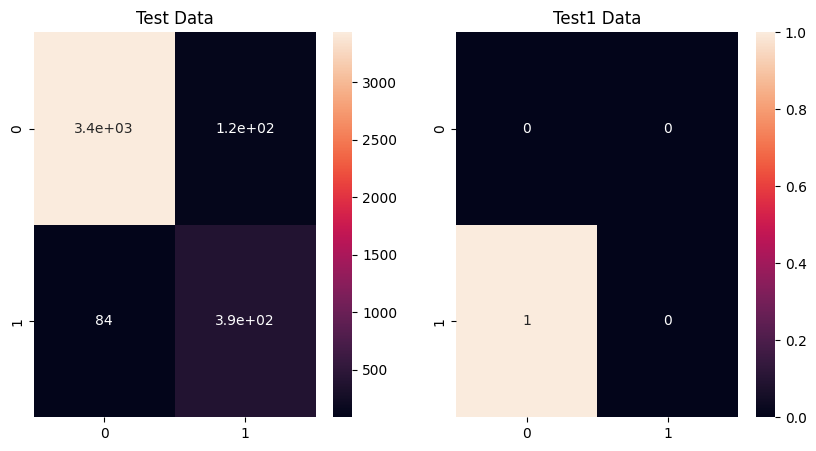

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3553
           1       0.77      0.82      0.80       478

    accuracy                           0.95      4031
   macro avg       0.87      0.90      0.88      4031
weighted avg       0.95      0.95      0.95      4031

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Model: DecisionTree
Train Accuracy: 1.0
Test Accuracy: 1.0
Test1 Accuracy: 1.0

[[3553    0]
 [   0  478]]
[[1]]



C:\Users\tipsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tipsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tipsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: Undefi

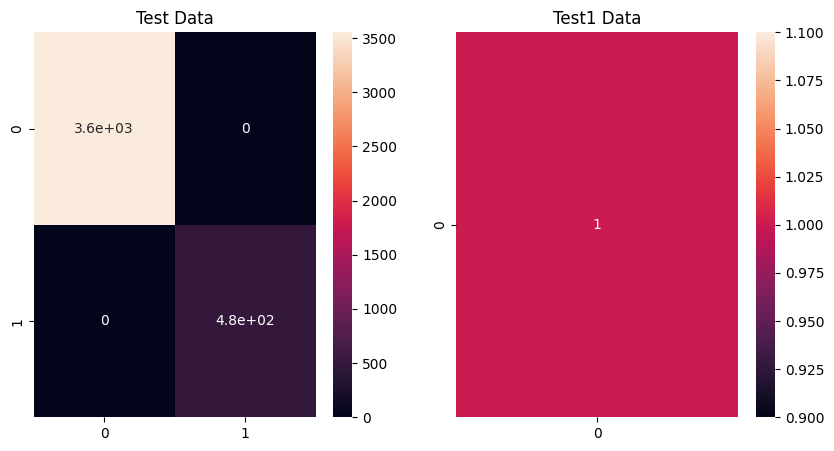

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3553
           1       1.00      1.00      1.00       478

    accuracy                           1.00      4031
   macro avg       1.00      1.00      1.00      4031
weighted avg       1.00      1.00      1.00      4031

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Model: RandomForest
Train Accuracy: 1.0
Test Accuracy: 1.0
Test1 Accuracy: 1.0

[[3553    0]
 [   0  478]]
[[1]]



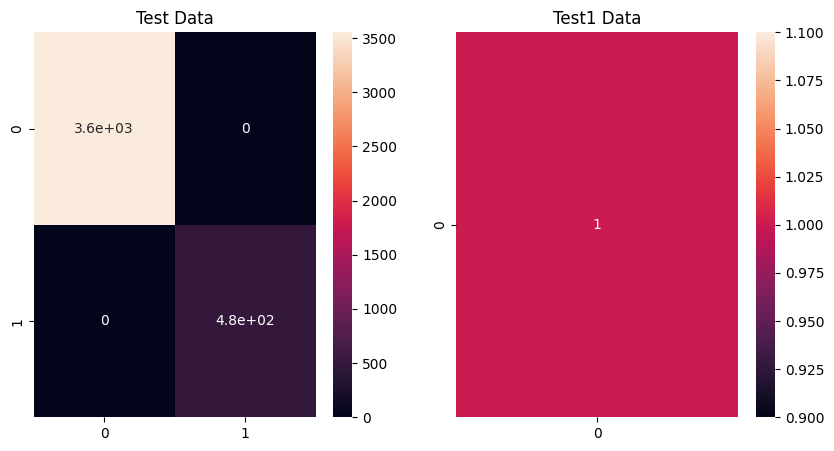

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3553
           1       1.00      1.00      1.00       478

    accuracy                           1.00      4031
   macro avg       1.00      1.00      1.00      4031
weighted avg       1.00      1.00      1.00      4031

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Model: ExtraTrees
Train Accuracy: 1.0
Test Accuracy: 1.0
Test1 Accuracy: 1.0

[[3553    0]
 [   0  478]]
[[1]]



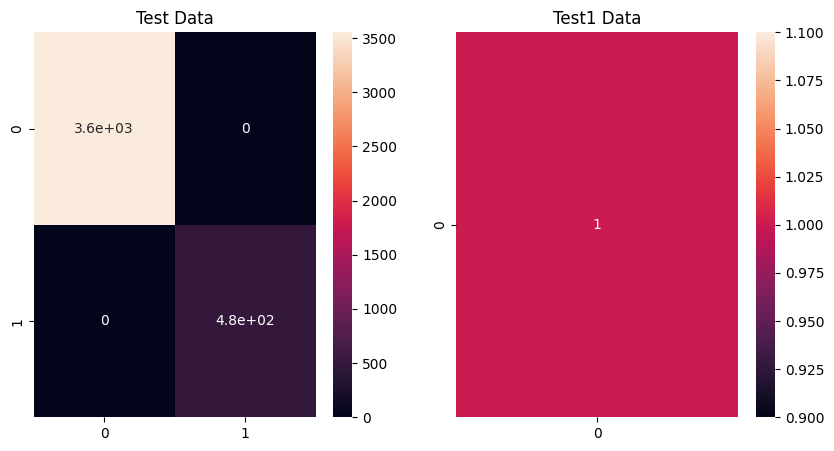

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3553
           1       1.00      1.00      1.00       478

    accuracy                           1.00      4031
   macro avg       1.00      1.00      1.00      4031
weighted avg       1.00      1.00      1.00      4031

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Model: XGBoost
Train Accuracy: 0.9997519841269841
Test Accuracy: 1.0
Test1 Accuracy: 0.0

[[3553    0]
 [   0  478]]
[[0 0]
 [1 0]]



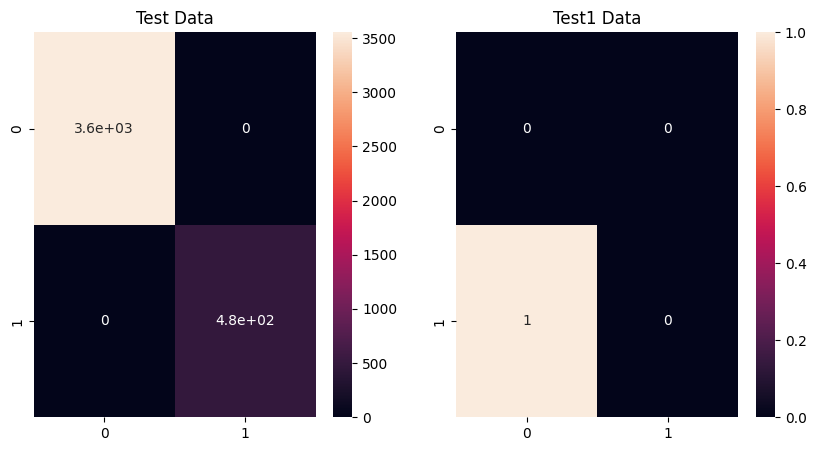

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3553
           1       1.00      1.00      1.00       478

    accuracy                           1.00      4031
   macro avg       1.00      1.00      1.00      4031
weighted avg       1.00      1.00      1.00      4031

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\tipsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tipsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tipsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: Undefi

Model: GradientBoosting
Train Accuracy: 0.9781746031746031
Test Accuracy: 0.9781691887869015
Test1 Accuracy: 1.0

[[3523   30]
 [  58  420]]
[[1]]



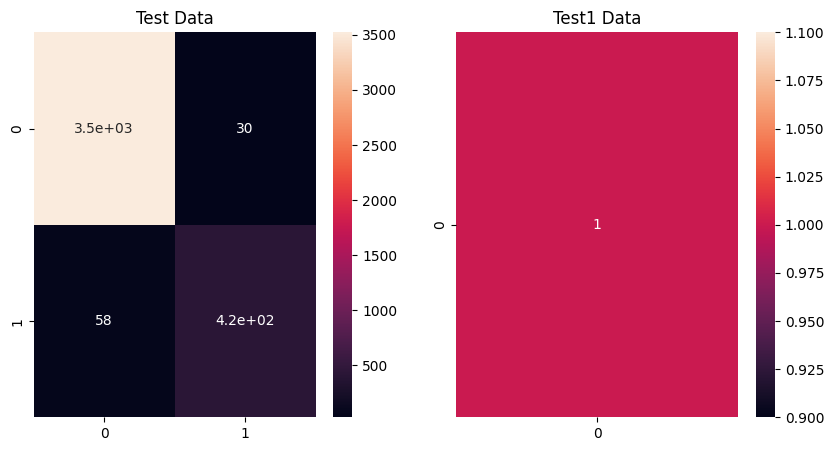

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3553
           1       0.93      0.88      0.91       478

    accuracy                           0.98      4031
   macro avg       0.96      0.94      0.95      4031
weighted avg       0.98      0.98      0.98      4031

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\tipsh\AppData\Local\Temp\ipykernel_22200\3567988325.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(mapping)


Model: ArtificalNeuralNetwork
Train Accuracy: 0.9170792079207921
Test Accuracy: 0.9170792079207921

[[ 368   78]
 [  56 1114]]



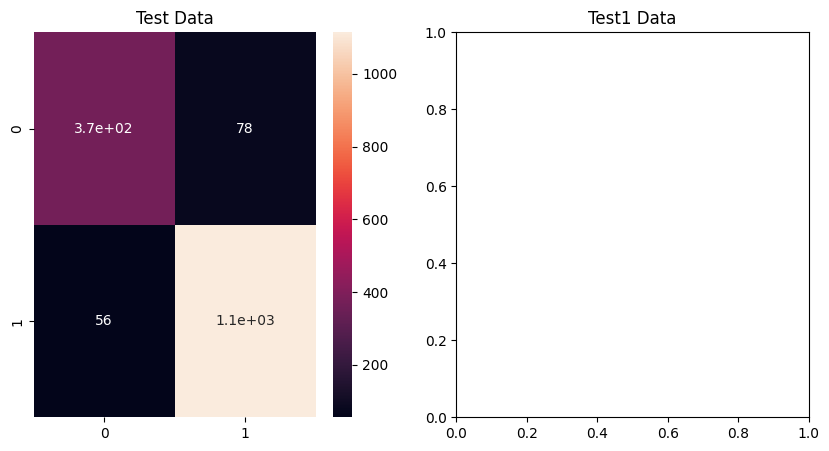

              precision    recall  f1-score   support

           1       0.87      0.83      0.85       446
           2       0.93      0.95      0.94      1170

    accuracy                           0.92      1616
   macro avg       0.90      0.89      0.89      1616
weighted avg       0.92      0.92      0.92      1616

Model: DecisionTree
Train Accuracy: 1.0
Test Accuracy: 1.0

[[ 446    0]
 [   0 1170]]



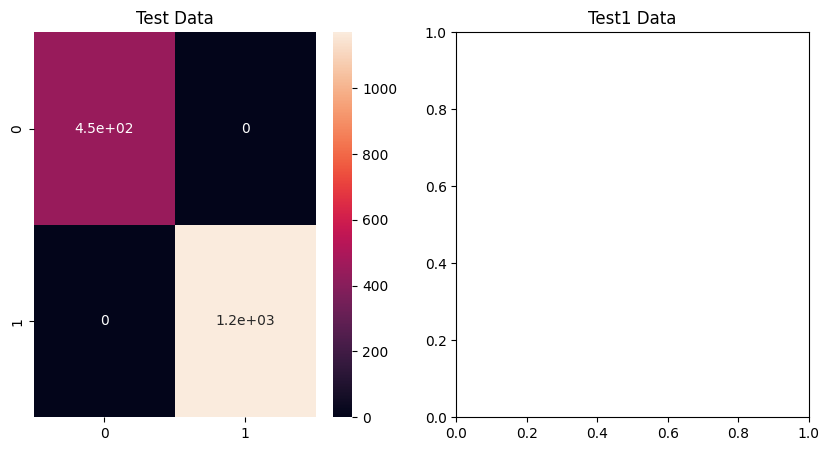

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       446
           2       1.00      1.00      1.00      1170

    accuracy                           1.00      1616
   macro avg       1.00      1.00      1.00      1616
weighted avg       1.00      1.00      1.00      1616

Model: RandomForest
Train Accuracy: 1.0
Test Accuracy: 1.0

[[ 446    0]
 [   0 1170]]



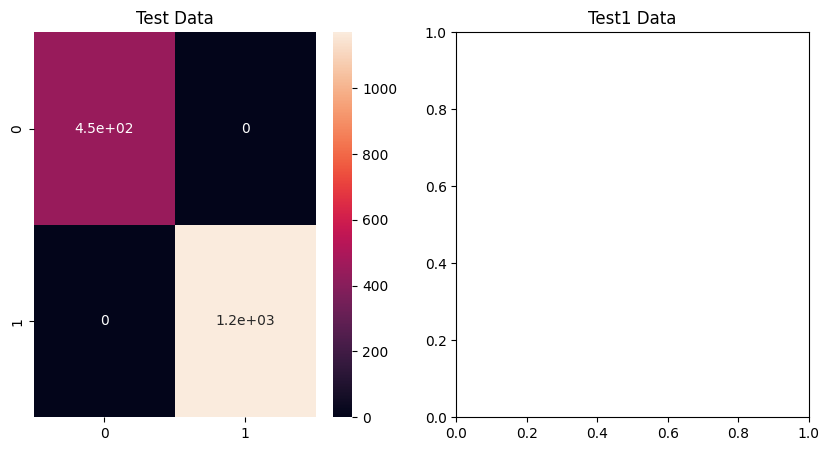

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       446
           2       1.00      1.00      1.00      1170

    accuracy                           1.00      1616
   macro avg       1.00      1.00      1.00      1616
weighted avg       1.00      1.00      1.00      1616

Model: ExtraTrees
Train Accuracy: 1.0
Test Accuracy: 1.0

[[ 446    0]
 [   0 1170]]



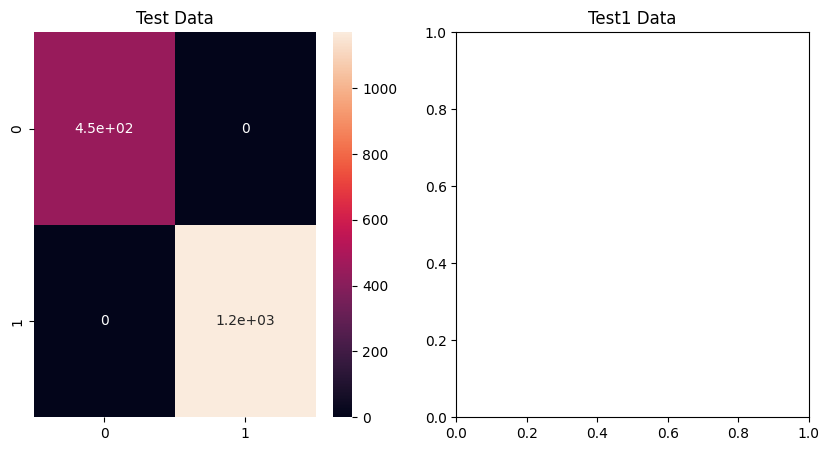

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       446
           2       1.00      1.00      1.00      1170

    accuracy                           1.00      1616
   macro avg       1.00      1.00      1.00      1616
weighted avg       1.00      1.00      1.00      1616



ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [1 2]

In [13]:
#Run All Models and print the confusion matrix and write the results to a file
#Compare test and test1 data results in matplotlib

def run_models(train,test,test1, models_dict,i,map_type=1):
    train_data = pd.read_csv(train[i])
    test_data = pd.read_csv(test[i])
    test_data1 = pd.read_csv(test1[i])
    train_data.fillna('NotA', inplace=True)
    data = pd.concat([train_data, test_data,test_data1])      
    
    #map the data
    mapping = GetAttributeMapping(data,map_type=map_type)  
    #encode the data
    data = data.replace(mapping)   
    
    #get the train and test data
    train_data = data.iloc[:len(train_data)]
    test_data = data.iloc[len(train_data):len(train_data)+len(test_data)]
    test_data1 = data.iloc[len(train_data)+len(test_data):]
    
    if(i==0):
        train_data['Year'] = train_data['Year'].replace('NotA',-1)
        train_data['Year'] = train_data['Year'].astype(int)
        train_data['Year.1'] = train_data['Year.1'].replace('NotA',-1)
        train_data['Year.1'] = train_data['Year.1'].astype(int)
        test_data['Year'] = test_data['Year'].replace('NotA',-1)
        test_data['Year'] = test_data['Year'].astype(int)
        test_data['Year.1'] = test_data['Year.1'].replace('NotA',-1)
        test_data['Year.1'] = test_data['Year.1'].astype(int)
        test_data1['Year'] = test_data1['Year'].replace('NotA',-1)
        test_data1['Year'] = test_data1['Year'].astype(int)
        test_data1['Year.1'] = test_data1['Year.1'].replace('NotA',-1)
        test_data1['Year.1'] = test_data1['Year.1'].astype(int)   
    
    X_train = train_data.drop(columns=["Access"])
    y_train = train_data["Access"]
    X_test = test_data.drop(columns=["Access"])
    y_test = test_data["Access"]
    X_test1 = test_data1.drop(columns=["Access"])
    y_test1 = test_data1["Access"]
    
    for model_name, model in models_dict.items():
        model.fit(X_train, y_train)
        print(f"Model: {model_name}")
        print(f"Train Accuracy: {model.score(X_train, y_train)}")
        print(f"Test Accuracy: {model.score(X_test, y_test)}")
        if(not X_test1.empty):
            print(f"Test1 Accuracy: {model.score(X_test1, y_test1)}")
        print("")
        y_pred = model.predict(X_test)
        if(not X_test1.empty):
            y_pred1 = model.predict(X_test1)
        
        #write confusion matrix to file

        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        if(not X_test1.empty):
            cm1 = confusion_matrix(y_test1, y_pred1)
            print(cm1)
       
        
        print("")
        
        #plot confusion matrix
        fig, ax = plt.subplots(1,2,figsize=(10,5))
        sns.heatmap(cm, annot=True, ax=ax[0])
        if(not X_test1.empty):
            sns.heatmap(cm1, annot=True, ax=ax[1])
        ax[0].set_title('Test Data')
        ax[1].set_title('Test1 Data')
        plt.show()
        
        #Print precision, recall, f1-score
        from sklearn.metrics import classification_report
        print(classification_report(y_test, y_pred))
        if(not X_test1.empty):
            print(classification_report(y_test1, y_pred1))
        
        #write to file
        
        with open(f"{data_names[i]}_naive_results.txt", "a") as f:
            f.write(f"Model: {model_name}\n")
            f.write(f"Train Accuracy: {model.score(X_train, y_train)}\n")
            f.write(f"Test Accuracy: {model.score(X_test, y_test)}\n")
            if(not X_test1.empty):
                f.write(f"Test1 Accuracy: {model.score(X_test1, y_test1)}\n")
            f.write(f"Confusion Matrix Test Data:\n{cm}\n")
            if(not X_test1.empty):
                f.write(f"Confusion Matrix Test1 Data:\n{cm1}\n")
            f.write(f"Classification Report Test Data:\n{classification_report(y_test, y_pred)}\n")
            if(not X_test1.empty):
                f.write(f"Classification Report Test1 Data:\n{classification_report(y_test1, y_pred1)}\n")
            f.write("\n")
        
run_models(trains,tests,test1,models_dict,0,1)
run_models(trains,tests,test1,models_dict,1,1)
run_models(trains,tests,test1,models_dict,2,1)



In [12]:
def same_conditions(col1,col2):
    if ((col1 == -1) or (col2 == -1)):
        return 2
    elif (col1==col2):
        return 1
    else:
        return 0

def chk_nota(col):
    if(col==-1):
        return 1
    else:
        return 0